# Algorithms Exercise 1

## Imports

In [139]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

## Word counting

Write a function `tokenize` that takes a string of English text and returns a list of words. It should also remove [stop words](http://en.wikipedia.org/wiki/Stop_words), which are common short words that are often removed before natural language processing. Your function should have the following logic:

* Split the string into lines using `splitlines`.
* Split each line into a list of words and merge the lists for each line.
* Use Python's builtin `filter` function to remove all punctuation.
* If `stop_words` is a list, remove all occurences of the words in the list.
* If `stop_words` is a space delimeted string of words, split them and remove them.
* Remove any remaining empty words.
* Make all words lowercase.

In [156]:
def tokenize(s, stop_words=None, punctuation='`~!@#$%^&*()_-+={[}]|\:;"<,>.?/}\t'):
    """Split a string into a list of words, removing punctuation and stop words."""
    
    #Splits string at lines
    lines = s.splitlines()

    word = []
    words = []
    merged = []
    filtered = []
    no_stop = []
    lower = []
    merged0 = []
    
    
    #Splits lines into words
    for entry in lines:
         words.append(entry.split())
    
    

    
    #splits list of lists into list of words
    for stuff in words:
         merged0 = merged0 + stuff
            
    for entry in merged0:
        word.append(entry.split('-'))

    for stuff in word:
         merged = merged + stuff

  
    def logic(x):
        if x in punctuation:
            return False
        return True
    
    #removes punctuation and creates new list of punctuation free words
    for entry in merged:
        word = []
        for char in entry:
            word = word + list(filter(logic,char))
        filtered.append(''.join(word))

    
    def logic2(x):
        if x in stop_words:
            return False
        return True
    
    if type(stop_words) == list:
        no_stop = list(filter(logic2,filtered))

        
    elif type(stop_words) == str:
        stop_words = stop_words.split()
        no_stop = list(filter(logic2,filtered))

    else:
        no_stop = filtered

        
    lower = [s.lower() for s in no_stop]
    return([entry for entry in lower if entry != '' and entry != ' '])

In [157]:
tokenize("wor!d\n word2--word3 \nword4")

['word', 'word2', 'word3', 'word4']

In [158]:
assert tokenize("This, is the way; that things will end", stop_words=['the', 'is']) == \
    ['this', 'way', 'that', 'things', 'will', 'end']
wasteland = """
APRIL is the cruellest month, breeding
Lilacs out of the dead land, mixing
Memory and desire, stirring
Dull roots with spring rain.
"""

assert tokenize(wasteland, stop_words='is the of and') == \
    ['april','cruellest','month','breeding','lilacs','out','dead','land',
     'mixing','memory','desire','stirring','dull','roots','with','spring',
     'rain']

Write a function `count_words` that takes a list of words and returns a dictionary where the keys in the dictionary are the unique words in the list and the values are the word counts.

In [159]:
def count_words(data):
    """Return a word count dictionary from the list of words in data."""
    d = {}
    for entry in data:
        if entry not in d:
            d[entry] = data.count(entry)
    return d

In [160]:
assert count_words(tokenize('this and the this from and a a a')) == \
    {'a': 3, 'and': 2, 'from': 1, 'the': 1, 'this': 2}

Write a function `sort_word_counts` that return a list of sorted word counts:

* Each element of the list should be a `(word, count)` tuple.
* The list should be sorted by the word counts, with the higest counts coming first.
* To perform this sort, look at using the `sorted` function with a custom `key` and `reverse`
  argument.

For this next part I had to look on stack exchange to see what it meant to have a custom key. I found this custom key on stack exchange that helps me sort by the first index in each tuple instead of the zero'th.

In [161]:
def getKey(item):
    return item[1]

In [162]:
def sort_word_counts(wc):
    lst = list(wc.items())
    return sorted(lst,key=getKey,reverse=True)

In [163]:
assert sort_word_counts(count_words(tokenize('this and a the this this and a a a'))) == \
    [('a', 4), ('this', 3), ('and', 2), ('the', 1)]

Perform a word count analysis on Chapter 1 of Moby Dick, whose text can be found in the file `mobydick_chapter1.txt`:

* Read the file into a string.
* Tokenize with stop words of `'the of and a to in is it that as'`.
* Perform a word count, the sort and save the result in a variable named `swc`.

In [164]:
#f = open('myfilename','r')
#f=f.read()

In [165]:
with open ("mobydick_chapter1.txt", "r") as myfile:
    f=myfile.read()

In [166]:
tk = tokenize(f, stop_words='the of and a to in is it that as', punctuation='`~!@#$%^&*()_-+={[}]|\:;"<,>.?/}\t');
cw = count_words(tk)
swc = sort_word_counts(cw)

Here I have changed the assert length to 849 from 848. The 848 assert was not accounting for words of the form word1--word2. The assert expected that word to be tokenized into just one word. But the way I wrote my program it splits an input of that form into two words.

If I remove my clause that reacts to the '-' case in my tokenize function it will pass the len(swc)=848.

In [172]:
assert swc[0]==('i',43)
assert len(swc)==849

Create a "Cleveland Style" [dotplot](http://en.wikipedia.org/wiki/Dot_plot_%28statistics%29) of the counts of the top 50 words using Matplotlib. If you don't know what a dotplot is, you will have to do some research...

In [173]:
swca = np.array(swc)

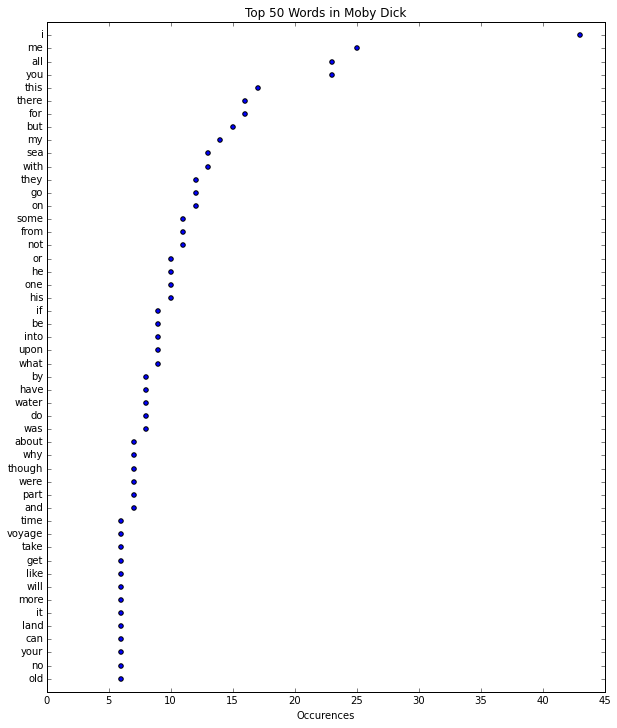

In [174]:
fig, ax = plt.subplots(1,1,figsize=(10,12))

y = np.arange(50,0,-1)
plt.scatter(swca[0:50,1],y)
plt.yticks(y,swca[0:50,0]);

plt.ylim(0,51)

plt.xlabel('Occurences');
plt.title('Top 50 Words in Moby Dick');


In [154]:
assert True # leave for grading